 ##Bitcoin price prediction using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
#import sklearn.metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("C:\\Users\\KIIT\\Downloads\\btc_6h.csv")
data.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182
1,2018-01-01 11:30:00,13539.00,13818.55,13001.13,13220.56,1876.934392
2,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13022.00,2427.898747
3,2018-01-01 23:30:00,13007.87,13599.70,12940.00,13380.00,1883.841523
4,2018-01-02 05:30:00,13382.16,13850.00,12890.02,13166.95,3957.954564


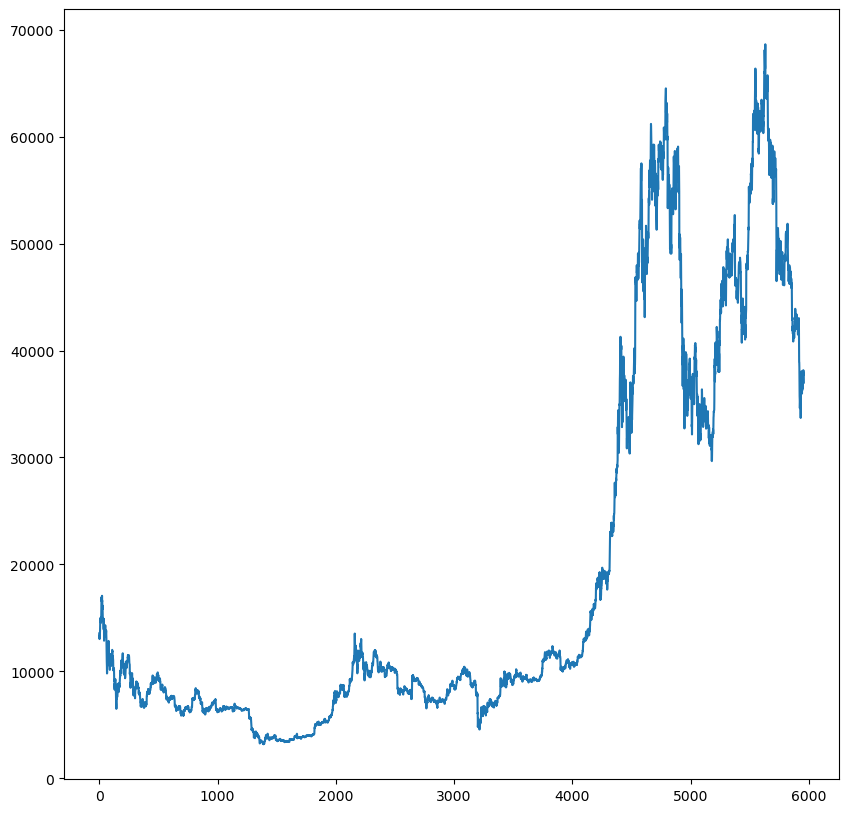

In [3]:
plt.figure(figsize=(10,10))
plt.plot(data['close'])
plt.show()

In [4]:
prediction_days = 30
close_data = data['close']
close_data
close_df = pd.DataFrame(close_data,columns =['close'])
close_df.head()


,close
0,13558.99
1,13220.56
2,13022.00
3,13380.00
4,13166.95


In [5]:
close_df['prediction'] = close_df['close'].shift(-prediction_days)
close_df.head()

,close,prediction
0,13558.99,14699.95
1,13220.56,14902.54
2,13022.00,14880.00
3,13380.00,14726.00
4,13166.95,14949.98


In [6]:
close_df.tail()

,close,prediction
5954,38139.39,NaN
5955,38110.02,NaN
5956,37991.00,NaN
5957,37881.76,NaN
5958,37001.65,NaN


In [7]:
x = close_df['close']
x = x[:len(data) - prediction_days]


In [8]:
y = close_df['prediction']
y = y[:-prediction_days]
#y = y.values.reshape(-1,1)

In [9]:
split_ratio = 0.8
train_size = int(len(data) * split_ratio)
test_size = len(data) - train_size
x_train = x[ :train_size]
x_test = x[ train_size : len(data)]
y_train = y[ :train_size]
y_test = y[train_size : len(data)]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4767,) (4767,)
(1162,) (1162,)


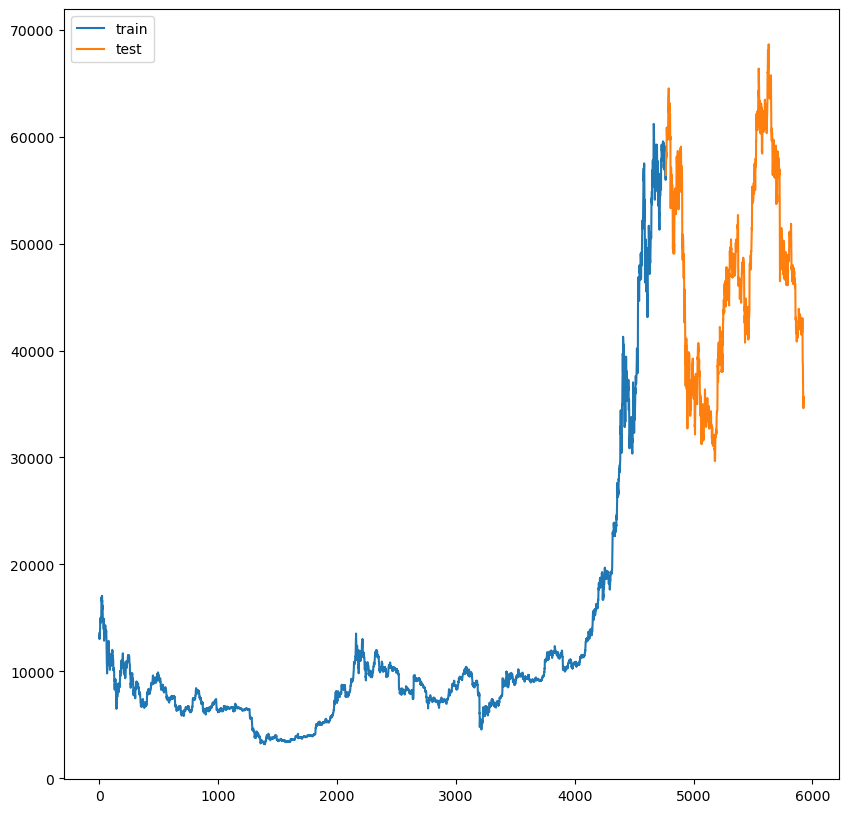

In [10]:
plt.figure(figsize=(10,10))
plt.plot(x_train,label = "train")
plt.plot(x_test,label = "test")
plt.legend()
plt.show()

In [11]:
X_train = x_train.values.reshape(-1,1)
Y_train = y_train.values.reshape(-1,1)

X_test = x_test.values.reshape(-1,1)
Y_test = y_test.values.reshape(-1,1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)

X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)

In [28]:
model = XGBRegressor(n_estimators = 10000,eta = 0.1)
model.fit(X_train,Y_train,verbose = 1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

In [29]:
pred = model.predict(X_test)
print("MSE -> ", mean_absolute_error(pred,y_test))
print("RMSE -> ",math.sqrt(mean_absolute_error(pred,y_test)))

MSE ->  46817.62621810068
RMSE ->  216.3738113037266


In [14]:
pred = pred.reshape(-1,1)
unscaled_pred = scaler.inverse_transform(pred)
unscaled_y_test = scaler.inverse_transform(Y_test)

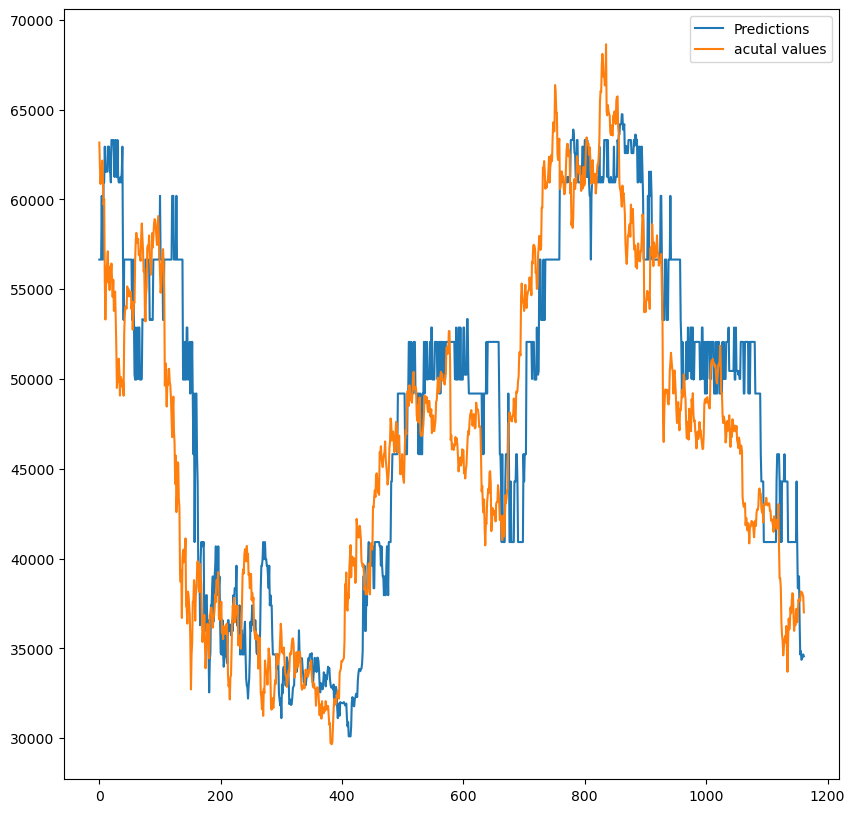

In [15]:
plt.figure(figsize=(10,10))
plt.plot(unscaled_pred,label = "Predictions")
plt.plot(unscaled_y_test,label = "acutal values")
plt.legend()
plt.show()

In [16]:
outsample1_4hr = pd.read_csv("C:\\Users\\KIIT\\Downloads\\btc_4h.csv")
outsample1_4hr_np = outsample1_4hr['close']
outsample1_4hr_df = pd.DataFrame(outsample1_4hr_np,columns = ['close'])
outsample1_4hr_df['predictions'] = outsample1_4hr_df['close'].shift(-prediction_days)
outsample1_4hr_df

,close,predictions
0,13410.03,16521.59
1,13570.35,16518.00
2,13220.56,16529.89
3,13247.00,16556.22
4,13240.37,16770.01
...,...,...
8926,38110.02,NaN
8927,37980.09,NaN
8928,37512.37,NaN
8929,37881.76,NaN


In [17]:
x_outsample_4hr = outsample1_4hr_df['close']
y_outsample_4hr = outsample1_4hr_df['predictions']

In [18]:
x_outsample_4hr = x_outsample_4hr[: len(outsample1_4hr) - prediction_days]
y_outsample_4hr = y_outsample_4hr[:-prediction_days] 
print(x_outsample_4hr.shape,y_outsample_4hr.shape)
X_outsample_4hr = x_outsample_4hr.values.reshape(-1,1)
print(X_outsample_4hr.shape)

(8901,) (8901,)
(8901, 1)


In [19]:
scaled_x_outsample_4hr = scaler.fit_transform(X_outsample_4hr)
scaled_predictions_4hr = model.predict(scaled_x_outsample_4hr)
Scaled_predictions_4hr = scaled_predictions_4hr.reshape(-1,1)
unscaled_predictions_4hr = scaler.inverse_transform(Scaled_predictions_4hr)

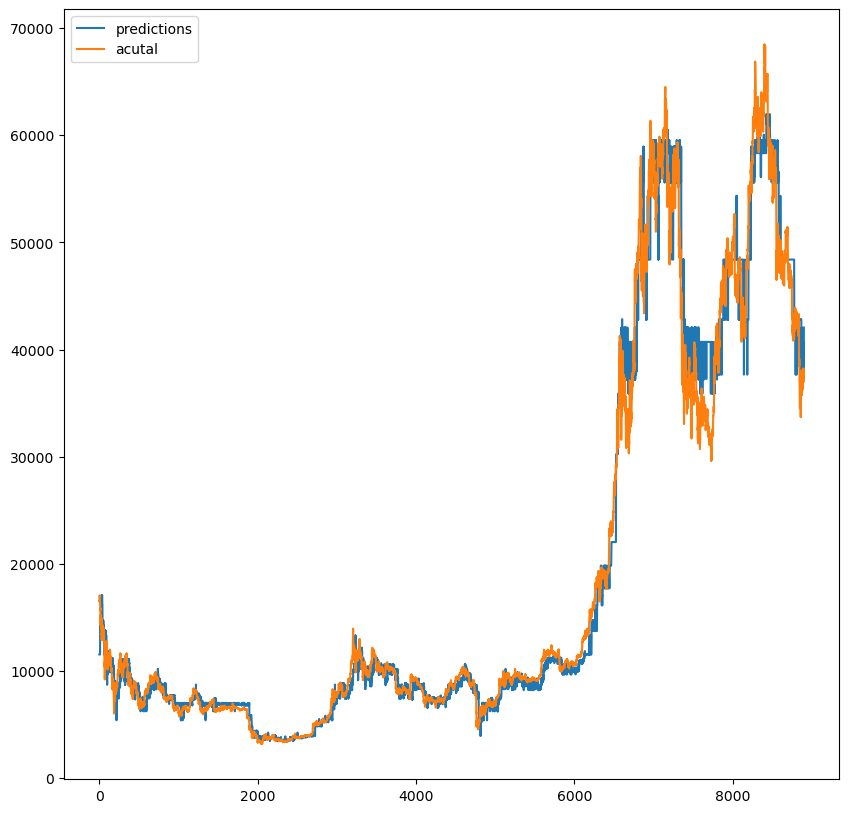

In [20]:
plt.figure(figsize=(10,10))
plt.plot(unscaled_predictions_4hr,label="predictions")
plt.plot(y_outsample_4hr, label = "acutal")
plt.legend()
plt.show()

In [21]:
unseen_data_2023 = pd.read_csv("C:\\Users\\KIIT\\Downloads\\BTC-USD.csv")
x_2023 = np.array(unseen_data_2023['Close'])
df_2023 = pd.DataFrame(x_2023,columns = ['close'])
df_2023['predictions'] = df_2023['close'].shift(-prediction_days)
df_2023

,close,predictions
0,38743.273438,42451.789063
1,36952.984375,39137.605469
2,37154.601563,39400.585938
3,41500.875000,38419.984375
4,41441.164063,38062.039063
...,...,...
699,44167.332031,NaN
700,44957.968750,NaN
701,42848.175781,NaN
702,44179.921875,NaN


In [22]:
outsample_2023_x = df_2023.close[ : len(df_2023) - prediction_days]
outsample_2023_y = df_2023['predictions']
outsample_2023_y = outsample_2023_y[ : -prediction_days]
print(outsample_2023_x.shape,outsample_2023_y.shape)

(674,) (674,)


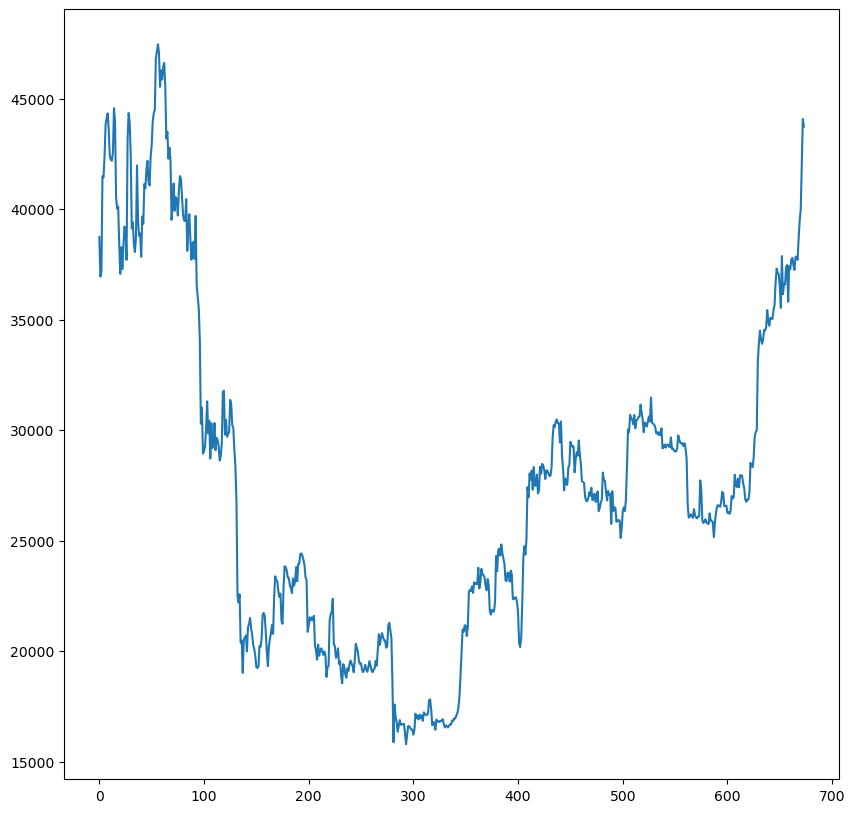

In [23]:
plt.figure(figsize = (10,10))
plt.plot(outsample_2023_x)
plt.show()

In [24]:
Outsample_2023_x = outsample_2023_x.values.reshape(-1,1)
scaled_2023_x = scaler.fit_transform(Outsample_2023_x)
scaled_2023_x.shape

(674, 1)

In [25]:
scaled_outsample_predictions_2023 = model.predict(scaled_2023_x)
Scaled_outsample_predictions_2023  = scaled_outsample_predictions_2023.reshape(-1,1)
unscaled_outsample_predictions_2023 = scaler.inverse_transform(Scaled_outsample_predictions_2023)

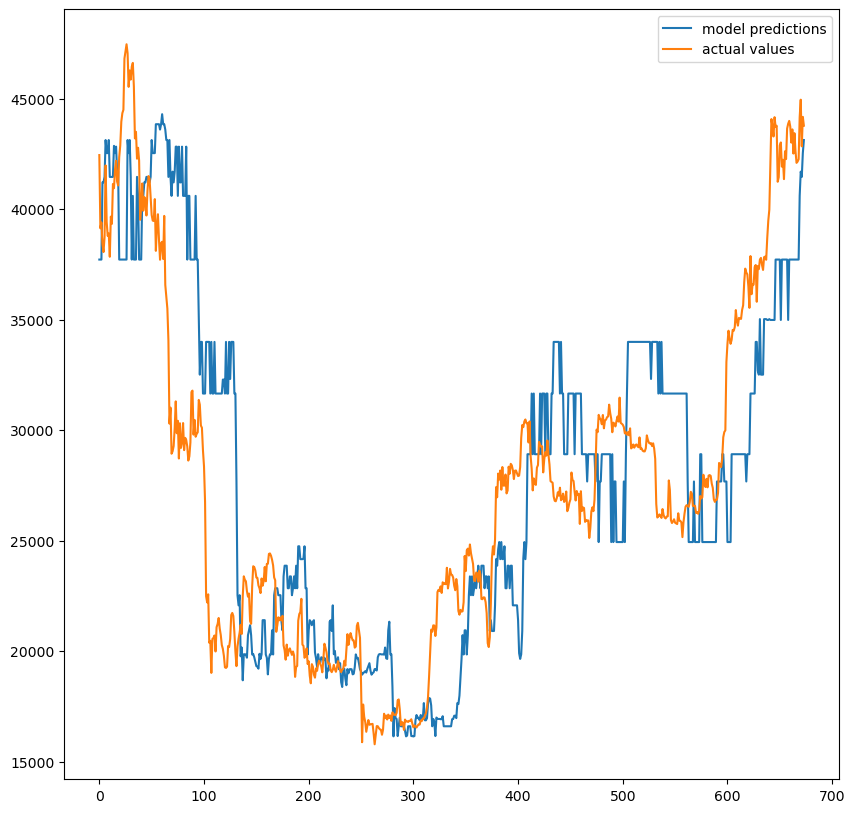

In [26]:
plt.figure(figsize=(10,10))
plt.plot(unscaled_outsample_predictions_2023, label = "model predictions")
plt.plot(outsample_2023_y, label = "actual values")
plt.legend()
plt.show()

In [27]:

print("mse -> ",mean_squared_error(unscaled_outsample_predictions_2023,outsample_2023_y))
print("rmse -> ",math.sqrt(mean_squared_error(unscaled_outsample_predictions_2023,outsample_2023_y)))

print("mae -> ",mean_absolute_error(unscaled_outsample_predictions_2023,outsample_2023_y))
print("rmae -> ",math.sqrt(mean_absolute_error(unscaled_outsample_predictions_2023,outsample_2023_y)))

mse ->  26276114.17926323
rmse ->  5126.023232415479
mae ->  4055.466960612667
rmae ->  63.68254832065585
